<a href="https://colab.research.google.com/github/jecinth011/AI-LAB1-Jecinth/blob/main/knnbinaryclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

--- Original Dataset ---
    Age  Income  Class
0    23   30000      0
1    25   35000      0
2    30   50000      0
3    35   60000      0
4    40   75000      0
5    45   80000      1
6    22   32000      0
7    28   48000      0
8    33   55000      1
9    38   70000      1
10   50   90000      1
11   55   95000      1
12   60  100000      1
13   65  110000      1
14   20   28000      0


KNN Classifier initialized with k=5

New Data Point to classify: Age=42, Income=68000

Predicted Class for the new data point: Type B (Higher Income/Age)
Probability of classes: [0.4 0.6] (0: 0.40, 1: 0.60)



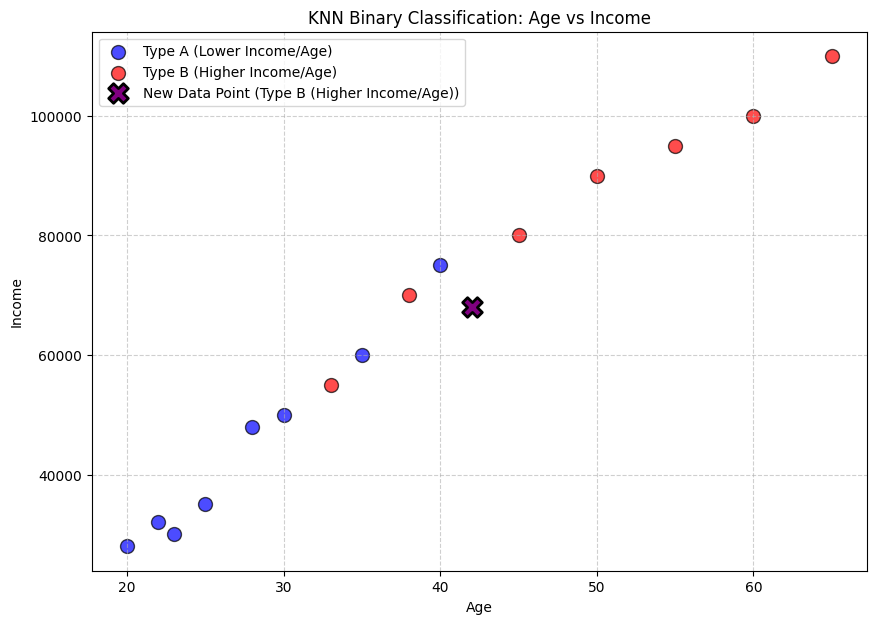

--- K-Nearest Neighbors for the new data point ---
Neighbor 1: Age=38, Income=70000, Class=Type B (Higher Income/Age), Distance=0.30
Neighbor 2: Age=40, Income=75000, Class=Type A (Lower Income/Age), Distance=0.30
Neighbor 3: Age=45, Income=80000, Class=Type B (Higher Income/Age), Distance=0.51
Neighbor 4: Age=35, Income=60000, Class=Type A (Lower Income/Age), Distance=0.59
Neighbor 5: Age=33, Income=55000, Class=Type B (Higher Income/Age), Distance=0.82


In [2]:
data = {
    'Age': [23, 25, 30, 35, 40, 45, 22, 28, 33, 38, 50, 55, 60, 65, 20],
    'Income': [30000, 35000, 50000, 60000, 75000, 80000, 32000, 48000, 55000, 70000, 90000, 95000, 100000, 110000, 28000],
    'Class': [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0] # 0 = Type A, 1 = Type B
}
df = pd.DataFrame(data)

print("--- Original Dataset ---")
print(df)
print("\n" + "="*30 + "\n")


X = df[['Age', 'Income']].values
y = df['Class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, y_train = X_scaled, y

knn_classifier = KNeighborsClassifier(n_neighbors=5)


knn_classifier.fit(X_train, y_train)

print(f"KNN Classifier initialized with k={knn_classifier.n_neighbors}\n")


new_data_point = np.array([[42, 68000]])

print(f"New Data Point to classify: Age={new_data_point[0,0]}, Income={new_data_point[0,1]}\n")


new_data_point_scaled = scaler.transform(new_data_point)


predicted_class = knn_classifier.predict(new_data_point_scaled)
predicted_class_proba = knn_classifier.predict_proba(new_data_point_scaled)

class_mapping = {0: 'Type A (Lower Income/Age)', 1: 'Type B (Higher Income/Age)'}

print(f"Predicted Class for the new data point: {class_mapping[predicted_class[0]]}")
print(f"Probability of classes: {predicted_class_proba[0]} (0: {predicted_class_proba[0][0]:.2f}, 1: {predicted_class_proba[0][1]:.2f})\n")


plt.figure(figsize=(10, 7))


plt.scatter(X[y == 0, 0], X[y == 0, 1],
            s=100, label=class_mapping[0], color='blue', edgecolors='black', alpha=0.7)

plt.scatter(X[y == 1, 0], X[y == 1, 1],
            s=100, label=class_mapping[1], color='red', edgecolors='black', alpha=0.7)


new_data_color = 'green' if predicted_class[0] == 0 else 'purple'
plt.scatter(new_data_point[0,0], new_data_point[0,1],
            s=200, marker='X', color=new_data_color, label=f'New Data Point ({class_mapping[predicted_class[0]]})',
            edgecolors='black', linewidth=2, zorder=5)

plt.title('KNN Binary Classification: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

distances, indices = knn_classifier.kneighbors(new_data_point_scaled)

print("--- K-Nearest Neighbors for the new data point ---")
for i in range(len(indices[0])):
    original_index = indices[0][i]
    neighbor_age = X[original_index, 0]
    neighbor_income = X[original_index, 1]
    neighbor_class = class_mapping[y[original_index]]
    distance = distances[0][i]
    print(f"Neighbor {i+1}: Age={neighbor_age}, Income={neighbor_income}, Class={neighbor_class}, Distance={distance:.2f}")